## News

Uses TfidfVectorizer and PassiveAggressiveClassifier to classify REAL and FAKE news

### Import Libraries

In [12]:
import numpy as np
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

### Load Dataset and Preprocessing

In [4]:
df = pd.read_csv('dataset/news.csv')

display(df)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
# check for null values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [23]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [7]:
y = df.label 
X = df.text

In [10]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
# initialise tfidfvectorizer
# max_df: when building vocabulary ignore terms that have a document frequency strictly higher than given threshold
tfid = TfidfVectorizer(stop_words='english', max_df=0.7)

tfid_train = tfid.fit_transform(X_train)
tfid_test = tfid.transform(X_test)

### Train Dataset

In [16]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfid_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

### Test Dataset

In [19]:
y_pred = pac.predict(tfid_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred),2)}')

Accuracy: 0.93


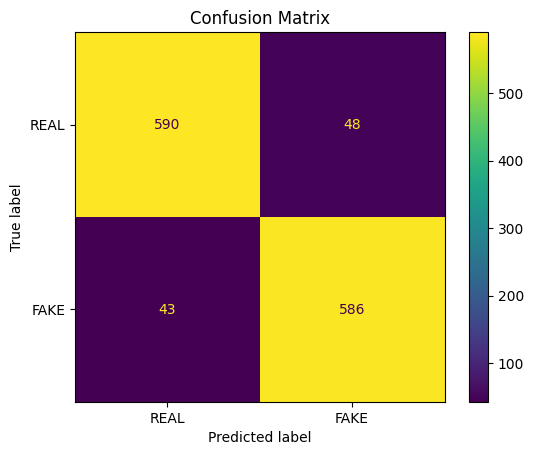

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['REAL','FAKE'])

cm_plot.plot()

plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

In [24]:
print(classification_report(y_test, y_pred, target_names=['REAL','FAKE']))

              precision    recall  f1-score   support

        REAL       0.93      0.92      0.93       638
        FAKE       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

